In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine

%matplotlib inline
pd.options.display.max_rows = 200

In [2]:
db_url = 'postgresql+psycopg2://localhost:5432/postgres'
engine = create_engine(db_url)

In [3]:
query = """
SELECT
    CASE WHEN employer_name LIKE '%%GOOGLE%%' THEN 'Google'
         WHEN employer_name LIKE '%%FACEBOOK%%' THEN 'Facebook'
         WHEN employer_name LIKE '%%NETFLIX%%' THEN 'Netflix'
         WHEN employer_name LIKE '%%UBER%%' THEN 'Uber'
         WHEN employer_name LIKE '%%AIRBNB%%' THEN 'Airbnb'
         WHEN employer_name LIKE '%%LYFT%%' THEN 'Lyft'
         WHEN employer_name LIKE '%%APPLE%%' THEN 'Apple'
         WHEN employer_name LIKE '%%AMAZON%%' THEN 'Amazon'
         WHEN employer_name LIKE '%%MICROSOFT%%' THEN 'Microsoft'
         WHEN employer_name LIKE '%%LINKEDIN%%' THEN 'Linkedin'
         WHEN employer_name LIKE '%%THUMBTACK%%' THEN 'Thumbtack'
         WHEN employer_name LIKE '%%ROKU%%' THEN 'Roku'
         WHEN employer_name LIKE '%%ADOBE%%' THEN 'Adobe'
         WHEN employer_name LIKE '%%STITCH FIX%%' THEN 'Stitch Fix'
         WHEN employer_name LIKE '%%DROPBOX%%' THEN 'Dropbox'
         WHEN employer_name LIKE '%%WORKDAY%%' THEN 'Workday'
         WHEN employer_name LIKE '%%SLACK%%' THEN 'Slack'
         WHEN employer_name LIKE '%%STRIPE%%' THEN 'Stripe'
         WHEN employer_name LIKE '%%TWITTER%%' THEN 'Twitter'
         WHEN employer_name LIKE '%%GITHUB%%' THEN 'Github'
         WHEN employer_name LIKE '%%COINBASE%%' THEN 'Coinbase'
         WHEN employer_name LIKE '%%PINTEREST%%' THEN 'Pinterest'
         ELSE NULL END AS company,
    CASE WHEN (job_title LIKE '%%SOFTWARE ENGINEER%%') AND (job_title NOT LIKE '%%MANAGER%%' AND job_title NOT LIKE '%%DIRECTOR%%' AND job_title NOT LIKE '%%HEAD%%' AND job_title NOT LIKE '%%VP%%' AND job_title NOT LIKE '%%PRESIDENT%%' AND job_title NOT LIKE '%%CHIEF%%') THEN 'software engineer'
         WHEN (job_title LIKE '%%DATA SCIENTIST%%' OR job_title NOT LIKE '%%DATA SCIENCE%%') AND (job_title NOT LIKE '%%MANAGER%%' AND job_title NOT LIKE '%%DIRECTOR%%' AND job_title NOT LIKE '%%HEAD%%' AND job_title NOT LIKE '%%VP%%' AND job_title NOT LIKE '%%PRESIDENT%%' AND job_title NOT LIKE '%%CHIEF%%') THEN 'data scientist'
         WHEN job_title LIKE '%%PRODUCT MANAGER%%' THEN 'product manager'
         ELSE LOWER(job_title) END AS role,
    worksite_city AS city, 
    worksite_state AS state, 
    prevailing_wage AS minimum_salary, 
    wage_rate_of_pay_from AS base_salary 
FROM h1b_salary
WHERE case_status = 'CERTIFIED'
AND (employer_name LIKE '%%GOOGLE%%'
  OR employer_name LIKE '%%FACEBOOK%%'
  OR employer_name LIKE '%%NETFLIX%%'
  OR employer_name LIKE '%%UBER%%'
  OR employer_name LIKE '%%AIRBNB%%'
  OR employer_name LIKE '%%LYFT%%'
  OR employer_name LIKE '%%APPLE%%'
  OR employer_name LIKE '%%AMAZON%%'
  OR employer_name LIKE '%%MICROSOFT%%'
  OR employer_name LIKE '%%LINKEDIN%%'
  OR employer_name LIKE '%%THUMBTACK%%'
  OR employer_name LIKE '%%ROKU%%'
  OR employer_name LIKE '%%ADOBE%%'
  OR employer_name LIKE '%%STITCH FIX%%'
  OR employer_name LIKE '%%PINTEREST%%'
  OR employer_name LIKE '%%WORKDAY%%'
  OR employer_name LIKE '%%SLACK%%'
  OR employer_name LIKE '%%STRIPE%%'
  OR employer_name LIKE '%%TWITTER%%'
  OR employer_name LIKE '%%GITHUB%%'
  OR employer_name LIKE '%%COINBASE%%'
  OR employer_name LIKE '%%DROPBOX%%')
AND wage_unit_of_pay = 'Year'
AND case_submitted >= '2015-06-01'
AND employment_start_date >= '2015-06-01'
AND worksite_state IN ('CA', 'NY', 'WA')
"""

In [4]:
df = pd.read_sql(query, engine)

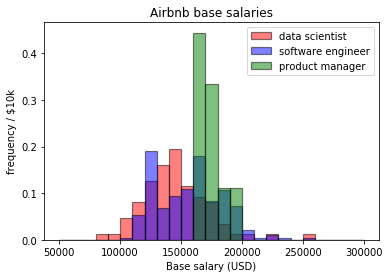

In [5]:
bin_size = 10000
bin_range = (50000, 300000)
bins = (bin_range[1]-bin_range[0])//bin_size
company = 'Airbnb'
roles = ['data scientist', 'software engineer', 'product manager']
colors = ['red', 'blue', 'green']
for i, role in enumerate(roles):
    company_df = df[(df.company == company) & (df.role == role)]
    weights = np.zeros_like(company_df.base_salary) + 1. / company_df.base_salary.size
    plt.hist(company_df.base_salary, bins=bins, range=bin_range, weights=weights, color=colors[i], alpha=0.5, edgecolor='black', label=role, linewidth=1.2)
plt.title('{} base salaries'.format(company))
plt.xlabel('Base salary (USD)')
plt.ylabel('frequency / ${}k'.format(bin_size//1000))
plt.legend()
plt.show()

In [6]:
df[df.role == 'data scientist'] \
    .groupby('company') \
    .agg({'base_salary': ['min', 'max', 'mean', 'median', 'count']})

base_salary                                          
                   min        max           mean    median count
company                                                         
Adobe          55682.0  205000.00  120916.606683  120000.0   410
Airbnb         85000.0  253629.79  143797.090575  140000.0    87
Amazon         46700.0  185000.00  119643.723150  120000.0  5540
Apple          27456.0  490000.00  130605.107796  128232.0  2514
Coinbase       95000.0  140000.00  114983.250000  111500.0     8
Dropbox        60000.0  200000.00  116543.070000  119642.0   100
Facebook       64480.0  250000.00  139887.600269  140000.0  1152
Github         82430.0  180000.00  135114.400000  145000.0    15
Google         67900.0  275000.00  127858.231778  125000.0  1372
Linkedin       75600.0  169749.00  116152.291411  115038.5   326
Lyft           57000.0  210000.00  138998.580645  140000.0    62
Microsoft      45677.0  247802.00  132079.618282  130000.0  2317
Netflix        59738.0  245856.00  149466.618321  164382.0   131
Pinterest      66400.0  146058.00  113515.323944  111500.0    71
Roku          100000.0  230000.00  155916.666667  150000.0    24
Slack          68000.0  153774.00  115362.425532  114000.0    47
Stitch Fix     49920.0  150000.00  106851.863636  116000.0    22
Stripe         67683.0  190000.00  103488.742857  100000.0    35
Thumbtack      90355.0  141669.00  114414.117647  116542.0    17
Twitter        50211.0  191000.00  133890.958904  132000.0   146
Uber           52000.0  250000.00  102560.268657   95017.5   402
Workday        65582.0  180000.00  117662.148352  116975.0   182

In [7]:
agged = df.groupby(['company', 'role']) \
    .agg({'base_salary':['median', 'count']}) \
    .base_salary \
    .reset_index()
agged[(agged['count'] > 20)].sort_values(['company','median'], ascending=[True,False])

,company,role,median,count
51,Adobe,software engineer,122533.000,52
3,Adobe,data scientist,120000.000,410
29,Adobe,product manager,117884.000,42
80,Airbnb,software engineer,155000.000,321
67,Airbnb,data scientist,140000.000,87
314,Amazon,software development manager,152100.000,242
365,Amazon,technical program manager iii,150000.000,34
308,Amazon,senior technical program manager,140000.000,44
362,Amazon,technical program manager,133010.000,278
209,Amazon,product manager,130000.000,682
